In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
house_data = pd.read_csv('HousingData.csv')
house_data.head(), house_data.shape, house_data.describe()

(      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
 0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
 1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
 2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
 3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
 4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7   
 
         B  LSTAT  MEDV  
 0  396.90   4.98  24.0  
 1  396.90   9.14  21.6  
 2  392.83   4.03  34.7  
 3  394.63   2.94  33.4  
 4  396.90    NaN  36.2  ,
 (506, 14),
              CRIM          ZN       INDUS        CHAS         NOX          RM  \
 count  486.000000  486.000000  486.000000  486.000000  506.000000  506.000000   
 mean     3.611874   11.211934   11.083992    0.069959    0.554695    6.284634   
 std      8.720192   23.388876    6.835896    0.255340    0.115878    0.702617   
 min      0.006

In [33]:
house_data = house_data.dropna()
house_data = house_data[house_data["MEDV"]!=50]

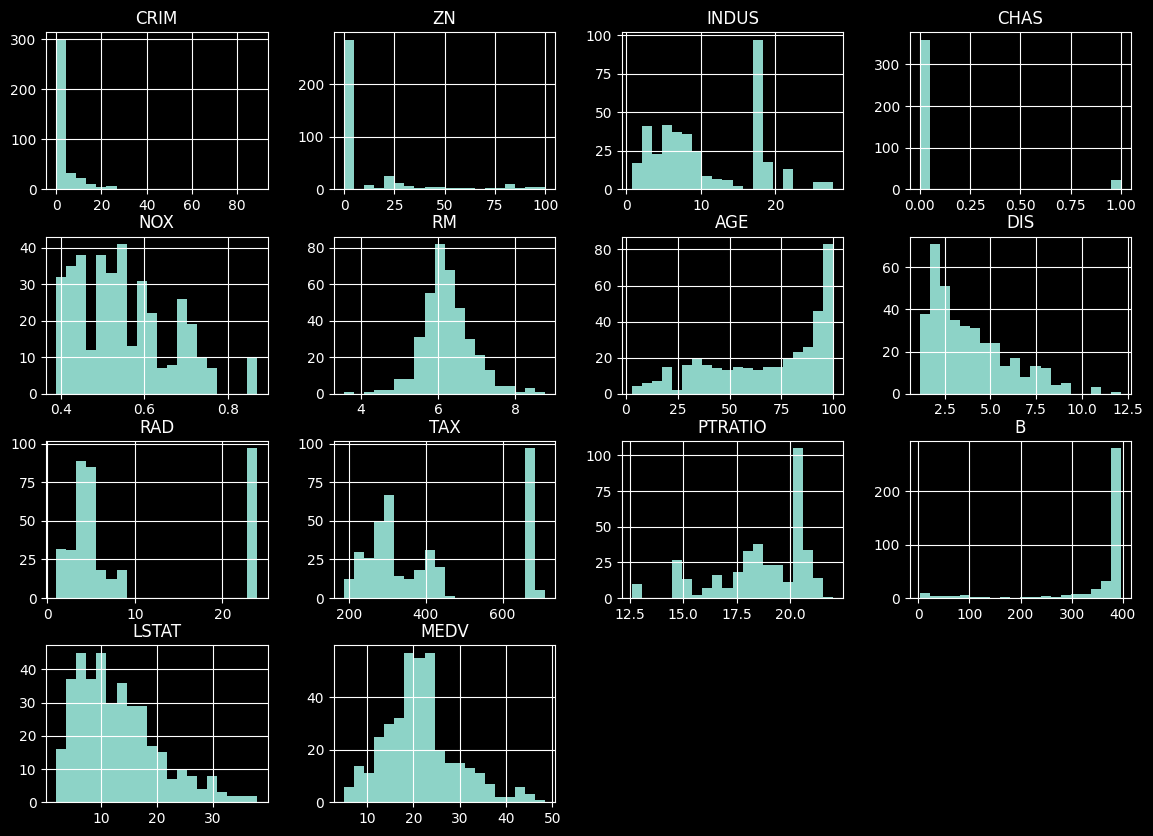

In [34]:
plot = house_data.hist(bins=20, figsize=(14,10))

In [35]:
# plot = sns.pairplot(house_data,hue='MEDV',palette='coolwarm')

<Axes: >

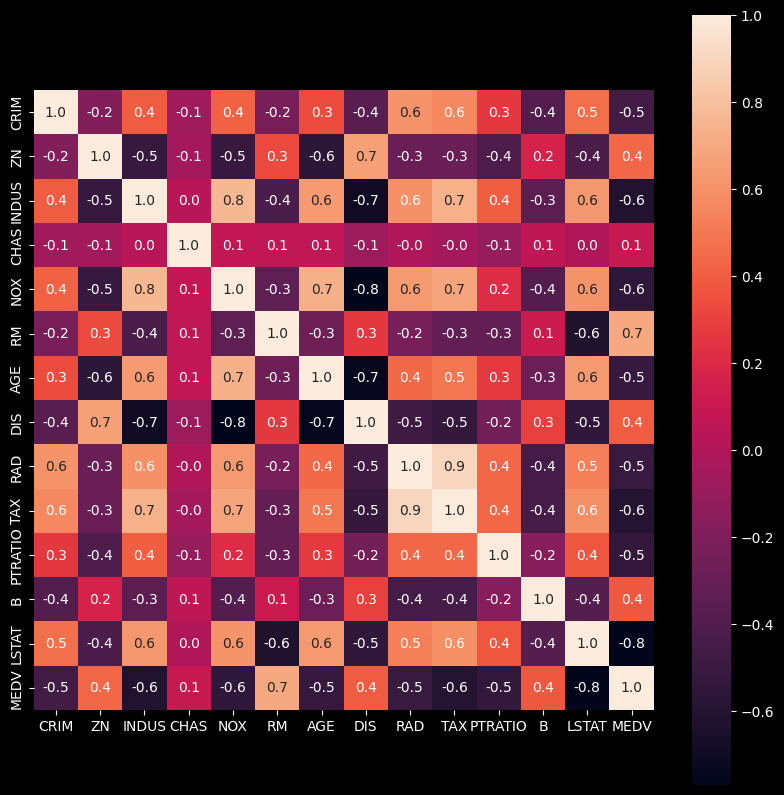

In [36]:
plt.figure(figsize=(10,10))
sns.heatmap(house_data.corr(),cbar=True,square=True,fmt='.1f',annot=True)

In [37]:
X=house_data.drop(columns={"MEDV",'ZN','AGE','INDUS'},axis=1)
Y=house_data["MEDV"]
X.head()

,CRIM,CHAS,NOX,RM,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,0.0,0.538,6.575,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,0.469,6.421,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,0.469,7.185,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,0.458,6.998,6.0622,3,222,18.7,394.63,2.94
5,0.02985,0.0,0.458,6.430,6.0622,3,222,18.7,394.12,5.21


In [38]:
# scalar=StandardScaler()
# scalar.fit(X)
# X_scaled=scalar.transform(X)
# X_scaled

In [39]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)
X_train.shape,X_test.shape

((305, 10), (77, 10))

In [40]:
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [41]:
Y_train_pred=model.predict(X_train)
error=mean_squared_error(Y_train,Y_train_pred)
score=r2_score(Y_train,Y_train_pred)
error,score

(13.004831689510137, 0.776169707913162)

In [42]:
Y_test_pred=model.predict(X_test)
error=mean_squared_error(Y_test,Y_test_pred)
score=r2_score(Y_test,Y_test_pred)
error,score

(13.63210222321569, 0.8076720185663304)

performance on train test linear regression

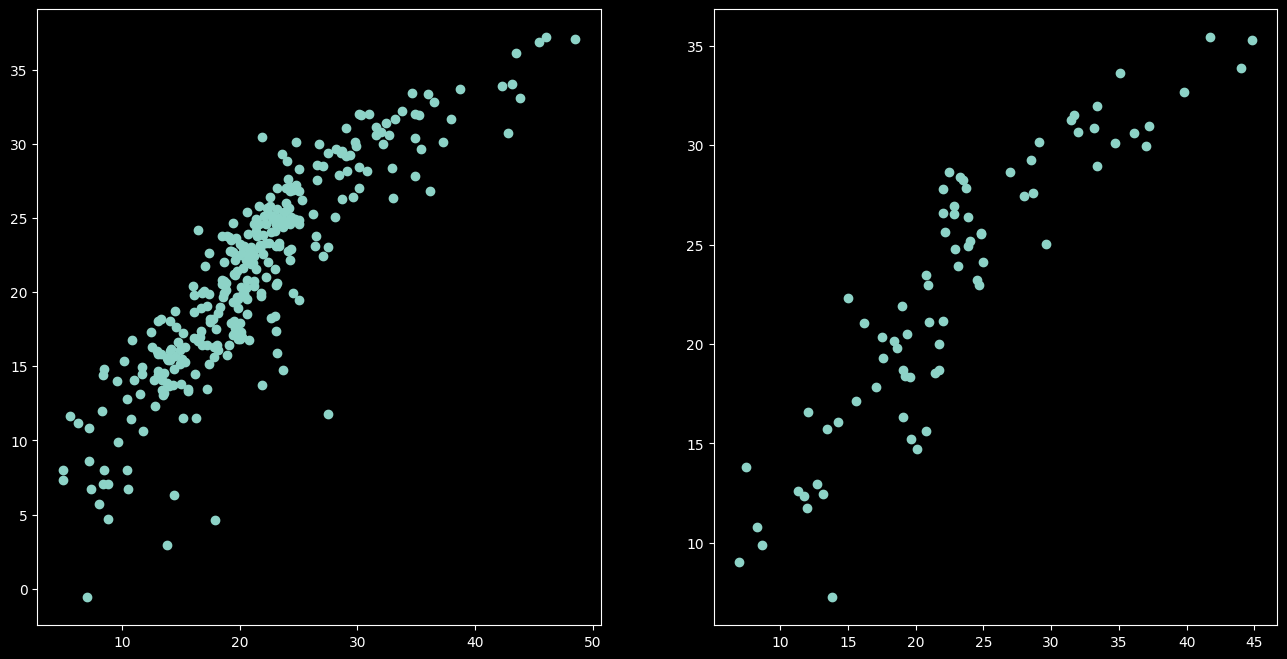

In [43]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.scatter(Y_train,Y_train_pred)
plt.subplot(1,2,2)
plt.scatter(Y_test,Y_test_pred)


In [44]:
X_train.head()

,CRIM,CHAS,NOX,RM,DIS,RAD,TAX,PTRATIO,B,LSTAT
378,23.64820,0.0,0.671,6.380,1.3861,24,666,20.2,396.90,23.69
428,7.36711,0.0,0.679,6.193,1.9356,24,666,20.2,96.73,21.52
410,51.13580,0.0,0.597,5.757,1.4130,24,666,20.2,2.60,10.11
346,0.06162,0.0,0.442,5.898,8.0136,3,352,18.8,364.61,12.67
250,0.14030,0.0,0.431,6.487,7.3967,7,330,19.1,396.28,5.90


In [45]:
Y_train.head()

378    13.1
428    11.0
410    15.0
346    17.2
250    24.4
Name: MEDV, dtype: float64